## verify neural discriminability with decoding accuracy

1. Check intermediate results, not just the end results.
2. Decoding at the single neuron/electrode level.
3. Decoding at the population level.
4. Test with one bird, one electrode.

5. Use dynamic time warping to calculate the mapping X --> Y. 
6. Use the calculated relationship to manipulate the responses X into X', where X' is a lengthened or shrinkaged version of X.
7. After the warping, one could compare the neural responses to different variant. This can be used to test how sensitive neurons are to acoustic variations & small variations in inter-syllable intervals.
8. 



## things 2 check for all experiments

1. electrode codes are consistent: left 100 to 1500, right 1700 to 3100.
2. check a few electrodes (left + right) from every bird.
    * verify the MUA and SUA by checking the raster plot.
    * verify that stimulus code, starting and ending time makes sense.
    * verify that firing rate calculation makes sense.
4. check experiment-specific things.
    * stimulus sequence.

In [1]:
# import required modules
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from librosa.core import dtw
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_context("talk")
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
import pdb
import scipy
from ipywidgets import interact, interactive, fixed, IntSlider


default_figsize = (10, 6)

# for importing customized figures
import sys
import mdlab as mdl
import variant_encoding_lib as vel
import variant_decoding as vd

figsize = default_figsize

In [2]:
frcc = mdl.FRCC(trailing_type="proportional", trailing_prop=0.5)
DAC = {"step_size": 100,  # step size for calcualting responses
       "repetitions": 40,  # number of repetitions per stimulus
       "critical_value": 0.01, 
       "st_trial": 6,  # starting & ending trial for adaptation rate calculation
       "ed_trial": 25,
       "normalize": True,
       "cost": "euclidean"
      }

## hyper parameters

In [5]:
condition = "blocked"
data_name = mdl.data_folder + condition + ".npz"
spikedata, stim = mdl.load_NpzData2SpikeData(data_name, convert_birdid=True)
print(spikedata.birdid)

['NB001' 'NB002' 'NB003' 'NB004' 'NB005' 'NB006' 'NB007' 'NB008' 'NT077'
 'WE067' 'WE073' 'WE084' 'WE094' 'WE100' 'WE120']


In [55]:
bird = "WE120"
birddata = spikedata.get_kw_SpikeData(birdid=bird)
num_ele = len(birddata.electrodes)

In [56]:
@interact
def explore_analysis(ele_code=IntSlider(min=0, max=num_ele-1, step=1), bird_data=fixed(birddata)):
    ele = bird_data.electrodes[ele_code]
    ele_data = bird_data.get_kw_SpikeData(electrode=ele)
    mdl.heat_plot(ele_data.spikes)
#     plt.xlim(150, 350)
#     mdl.raster_plot(ele_data.spikes)
    
#     stim_data = ele_data.get_kw_SpikeData(stim=ele_data.stim[0])
#     mdl.raster_plot(stim_data.spikes)
#     plt.xlim(1.5, 4)
#     plt.xlim()
    print ele_data.header.head(1)
    print(ele_data.site_stats())


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2VsZV9jb2RlJywgbWF4PTQzKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWnigKY=


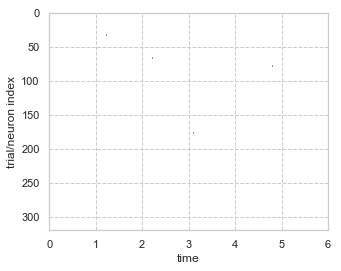

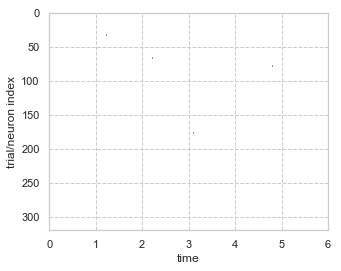

In [44]:
ele = 1700
ele_data = birddata.get_kw_SpikeData(electrode=ele)
mdl.raster_plot(ele_data.spikes)

## decoding analysis

## PSTH every 5 trials

In [24]:
spikedata.stim[0]

1

## check the neural discriminability before normalization

## how does neural discriminability change with the difference in stimulus duration

## decoding